In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import LinearRegression, train_test_split, z_score_normalization

In [2]:
df = pd.read_csv('./dataset/Linear Regression Train.csv')
df.shape

(600000, 16)

In [3]:
df.sample(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,target
246426,0.0776,30.9601,-1.4492,-0.0497,0.1464,-1.4491,0.4287,9672.0,153.9740,1860.0,-0.3687,-0.6586,0.2128,0.9814,14.0241,108.0
582565,-0.0531,28.1535,0.1069,-1.0411,0.4109,0.1070,1.6674,18430.0,194.5308,2730.0,-0.2713,-0.3885,0.2453,-0.8624,-5.9261,165.0
43196,0.5773,27.2624,-0.2644,1.1685,-0.0993,-0.2643,-1.6685,10521.0,167.5804,1836.0,0.0286,1.6506,0.1748,-0.0039,42.6577,98.0
41131,-0.3028,-9.9067,-0.2975,0.3006,-1.0439,-0.2974,0.8008,16456.0,183.9082,85.0,0.7354,-0.5449,0.0116,1.5463,0.0888,4.0
97085,1.3539,12.5699,1.1804,-0.6341,1.6919,1.1805,-0.1473,12528.0,178.2711,2415.0,0.7693,-0.2728,0.2170,-0.8550,-5.9261,144.0


In [4]:
X = df.drop('target', axis=1).values
y = df['target'].values
X.shape, y.shape

((600000, 15), (600000,))

In [5]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = z_score_normalization(X_train)
X_test = z_score_normalization(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480000, 15), (120000, 15), (480000,), (120000,))

In [ ]:
alpha = 0.5
iters = 10
model = LinearRegression(alpha=alpha, iters=iters)
model.fit(X_train, y_train)


Epoch 0: Cost 1551.816632562909
Epoch 1: Cost 503.3297732358902
Epoch 2: Cost 242.34337130974419
Epoch 3: Cost 174.1589117964319
Epoch 4: Cost 153.90433957493676
Epoch 5: Cost 145.99685931858872
Epoch 6: Cost 141.5557916988076
Epoch 7: Cost 138.28352906779392
Epoch 8: Cost 135.53399316037286
Epoch 9: Cost 133.091645903425


(array([ 1.66820599e-02,  5.69036463e-01, -2.29740036e-03,  3.48364141e-02,
         2.16722903e-02, -2.29740036e-03, -1.76486277e-02,  2.31191934e+00,
        -6.47438709e-01,  3.25534650e+01, -3.07901726e-02, -1.87738425e-02,
         1.95994241e+01,  2.31965916e-02, -9.35694931e+00]),
 np.float64(88.2541925171197))

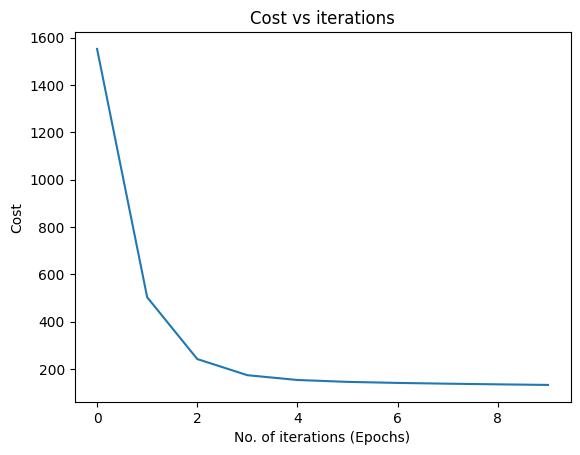

In [7]:
model.plot_cost()

In [8]:
y_pred = model.predict(X_test)

In [9]:
model.evaluation_metrics(y_test, y_pred)

R2 Score: 0.9316141284050549
Mean Squared Error: 267.57597574452103
Root Mean Squared Error: 16.35774971518152
Mean Absolute Error: 11.64435179092767


(np.float64(0.9316141284050549),
 np.float64(267.57597574452103),
 np.float64(16.35774971518152),
 np.float64(11.64435179092767))

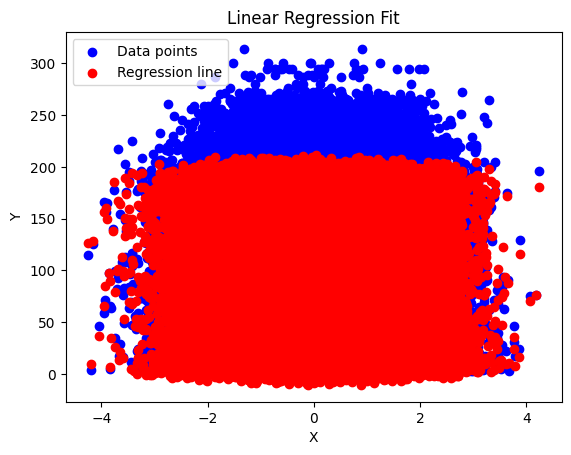

In [10]:
model.plot_regression_line(X_test, y_test)

In [11]:
df_test = pd.read_csv('./dataset/Linear Regression Test.csv')
df_test.shape

(150000, 15)

In [14]:
df[df.isnull().any(axis=1)]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,target


In [12]:
X_testing = df_test.values
X_testing = z_score_normalization(X_testing)

In [13]:
X_testing.shape

(150000, 15)

In [15]:
y_pred_test = model.predict(X_testing)
y_pred_test

array([183.35225292,  73.06322491,  46.86393318, ...,  22.35863762,
        42.37787739, 174.73752808], shape=(150000,))

In [19]:
df_test = df_test.assign(target=y_pred_test)
df_test.head()


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,target
0,0.6915,25.5722,-0.9571,-0.8410,-1.2963,-0.9570,0.7105,9943.0,165.6137,3132.0,-0.8214,0.1735,0.2661,-0.7452,4.0693,183.352253
1,0.7696,2.9563,1.0494,1.4816,1.7489,1.0495,-0.1138,15573.0,179.7443,1222.0,-0.5724,0.0919,0.1368,0.8142,51.4740,73.063225
2,0.4008,3.2860,0.8163,0.8417,-0.9317,0.8164,0.9532,15624.0,186.6684,890.0,-1.0562,-0.7804,0.1111,0.9281,80.7973,46.863933
3,0.8083,48.3302,-0.6946,0.5137,2.5230,-0.6945,0.5092,9338.0,165.0163,1862.0,2.0771,-1.3976,0.1919,1.7955,23.8387,114.814659
4,-0.2965,-0.2150,-0.4264,-0.4088,0.3155,-0.4263,-1.5362,13937.0,178.7227,882.0,-0.5273,-0.6792,0.0909,1.6266,74.5113,42.021160


In [21]:
df_test.to_csv('./output/Linear_Regression_Predictions.csv', index=False)